# Sales Analysis

#### Import necessary libraries

In [9]:
import os
import pandas as pd

#### Merge all data from each month into one CSV

In [10]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)
    

#### Read in updated dataframe

In [11]:
all_data = pd.read_csv("./Output/all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

##### Drop rows of NAN

In [12]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Get rid of text in order date column

In [13]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

#### Make columns correct type

In [42]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
 7   City              185950 non-null  object 
 8   Sales             185950 non-null  float64
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 13.5+ MB


In [45]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])


### Augment data with additional columns

#### Add month column

In [16]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add month column (alternative method)

In [20]:
all_data['Month 2'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

/var/folders/6w/tsyzxkh94m5f489mqdvc3ztm0000gn/T/ipykernel_4660/1522122304.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Month 2'] = pd.to_datetime(all_data['Order Date']).dt.month


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4


#### Add city column

In [37]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


#### Remove duplicate rows 

In [ ]:
duplicate_rows = all_data.drop_duplicates(inplace= True)
duplicate_rows.head()

## Data Exploration!

#### Question 1: What was the best month for sales? How much was earned that month? 

In [26]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [53]:
results = all_data.groupby(['Month']).sum()
results['Sales']

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

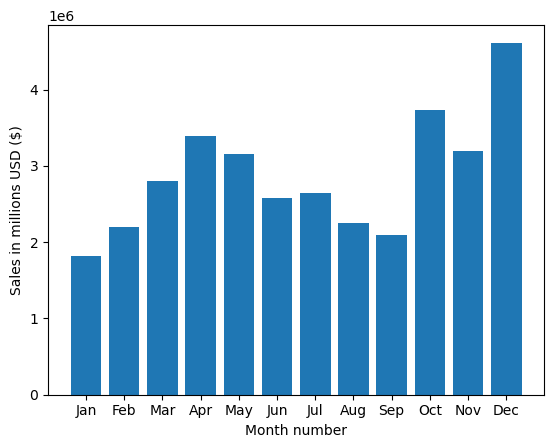

In [51]:
import matplotlib.pyplot as plt
import calendar

month_names = [calendar.month_abbr[i] for i in range(1, 13)]

months = range(1,13)

plt.bar(months,results['Sales'])
plt.xticks(months, month_names)  # Substituindo os números pelos nomes abreviados
plt.ylabel('Sales in millions USD ($)')
plt.xlabel('Month number')
plt.show()



#### Question 2: What city sold the most product?

In [46]:
all_data.groupby(['City']).sum()['Sales']

City
Atlanta  (GA)          2795498.58
Austin  (TX)           1819581.75
Boston  (MA)           3661642.01
Dallas  (TX)           2767975.40
Los Angeles  (CA)      5452570.80
New York City  (NY)    4664317.43
Portland  (ME)          449758.27
Portland  (OR)         1870732.34
San Francisco  (CA)    8262203.91
Seattle  (WA)          2747755.48
Name: Sales, dtype: float64

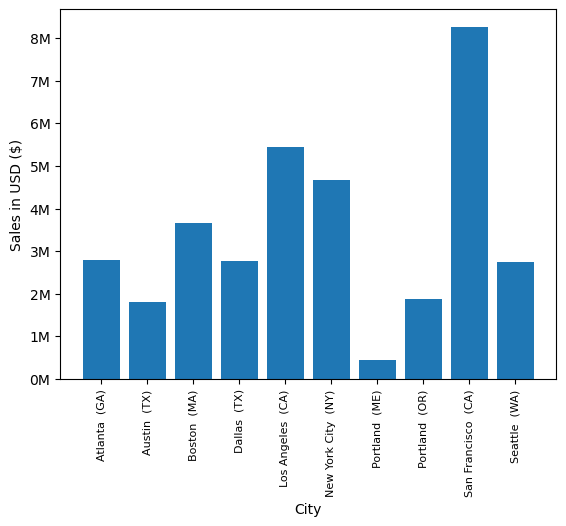

In [57]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Feito para previnir o erro unhashable type: 'numpy.ndarray que é formato invalido
grouped_data = all_data.groupby('City').sum()['Sales']
keys = grouped_data.index # obtem as cidades em string
values = grouped_data.values # obtem os valores em number

# Gerando o gráfico de barras
plt.bar(keys, values)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.xticks(keys, rotation='vertical', size=8)

# usado para formatar o valor do eixo Y 
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))

plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [58]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()


/var/folders/6w/tsyzxkh94m5f489mqdvc3ztm0000gn/T/ipykernel_1512/2818534198.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
/var/folders/6w/tsyzxkh94m5f489mqdvc3ztm0000gn/T/ipykernel_1512/2818534198.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27,1


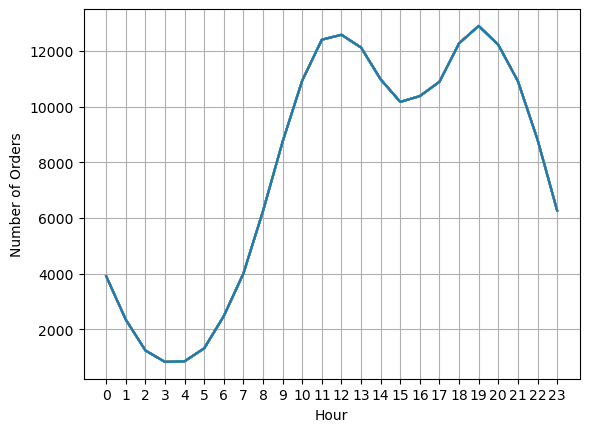

In [78]:
# grouped_data = all_data.groupby('Hour').count()['Count']

# # Extraindo as horas (índices) e os valores de contagem
# keys = grouped_data.index
# values = grouped_data.values

# # Gerando o gráfico de linha
# plt.plot(keys, values)
# plt.xticks(keys)
# plt.xlabel('Hour')
# plt.ylabel('Number of Orders')
# plt.grid(True)
# plt.show()

hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count()),
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

# My recommendation is slightly before 11am or 7pm

#### Question 4: What products are most often sold together?

In [81]:
# Filtra as linhas onde 'Order ID' está duplicado (indicando produtos vendidos juntos)
df = all_data[all_data['Order ID'].duplicated(keep=False)].copy()

# cria uma coluna chamada Grouped, Agrupa os produtos pelo 'Order ID' e os junta em uma única string separada por vírgulas para previnir erro
df.loc[:, 'Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Remove duplicatas para evitar contar o mesmo pedido várias vezes
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

df2.head()


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [71]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### What product sold the most? Why do you think it sold the most?

([<matplotlib.axis.XTick at 0x169915e50>,
 [Text(0.0, 0, '20in Monitor'),
  Text(1.0, 0, '27in 4K Gaming Monitor'),
  Text(2.0, 0, '27in FHD Monitor'),
  Text(3.0, 0, '34in Ultrawide Monitor'),
  Text(4.0, 0, 'AA Batteries (4-pack)'),
  Text(5.0, 0, 'AAA Batteries (4-pack)'),
  Text(6.0, 0, 'Apple Airpods Headphones'),
  Text(7.0, 0, 'Bose SoundSport Headphones'),
  Text(8.0, 0, 'Flatscreen TV'),
  Text(9.0, 0, 'Google Phone'),
  Text(10.0, 0, 'LG Dryer'),
  Text(11.0, 0, 'LG Washing Machine'),
  Text(12.0, 0, 'Lightning Charging Cable'),
  Text(13.0, 0, 'Macbook Pro Laptop'),
  Text(14.0, 0, 'ThinkPad Laptop'),
  Text(15.0, 0, 'USB-C Charging Cable'),
  Text(16.0, 0, 'Vareebadd Phone'),
  Text(17.0, 0, 'Wired Headphones'),
  Text(18.0, 0, 'iPhone')])

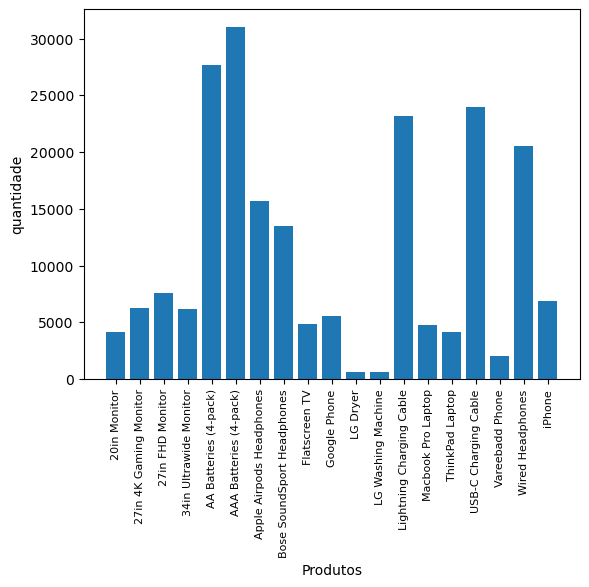

In [75]:
# product_group = all_data.groupby('Product')
# quantity_ordered = product_group.sum()['Quantity Ordered']

# keys = [pair for pair, df in product_group]
# plt.bar(keys, quantity_ordered)
# plt.xticks(keys, rotation='vertical', size=8)
# plt.show()

grouped_data = all_data.groupby('Product').sum()['Quantity Ordered']
keys = grouped_data.index # obtem as cidades em string
values = grouped_data.values # obtem os valores em number

# Gerando o gráfico de barras
plt.bar(keys, values)
plt.ylabel('quantidade')
plt.xlabel('Produtos')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()


C:\Users\keith\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


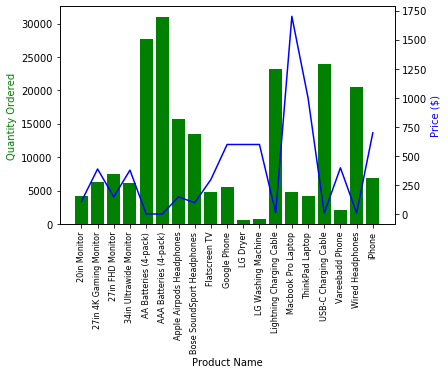

In [75]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()